# Forecasting Timeseries Data using Fb Prophet
Steps required with prophet
1. introdution and INstallation
2. Data preprocessing with time series
3. Model fitting
4. Obtaining the forecasts
5. Plotting the forecasts
6. Cross validation
7. Computing performance metrics 
8. Visualise the performance metrics
9. Conclusion

In [137]:
## pip install pystan
import pandas as pd
import matplotlib.pyplot as plt
import prophet
%matplotlib inline

In [138]:
df= pd.read_csv('monthly-milk-production-pounds.csv')
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [139]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [140]:
df.drop(168,axis=0,inplace=True)

In [141]:
df.isnull().sum()

Month                                                       0
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    0
dtype: int64

In [142]:
df.tail(20)

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
148,1974-05,969.0
149,1974-06,947.0
150,1974-07,908.0
151,1974-08,867.0
152,1974-09,815.0
153,1974-10,812.0
154,1974-11,773.0
155,1974-12,813.0
156,1975-01,834.0
157,1975-02,782.0


In [143]:
 df.columns = ['ds','y']

In [144]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [145]:
df['ds'] = pd.to_datetime(df['ds'])

In [146]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

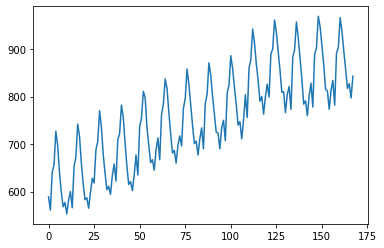

In [147]:
df['y'].plot()

In [118]:
##df['y'] = df['y']-df['y'].shift(1)

In [148]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


<AxesSubplot:>

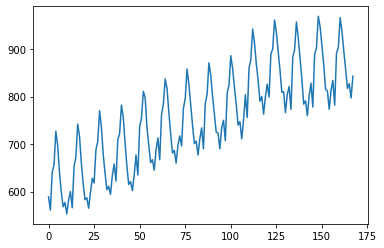

In [149]:
df['y'].plot()

In [150]:
from prophet import Prophet

In [151]:
#### Initialize the Model
model = Prophet()
model.fit(df)


21:58:03 - cmdstanpy - INFO - Chain [1] start processing
21:58:03 - cmdstanpy - INFO - Chain [1] done processing


In [152]:
future_dates = model.make_future_dataframe(periods=365)

In [153]:
future_dates.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


In [154]:
prediction = model.predict(future_dates)

In [155]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,607.022298,577.138220,596.805144,607.022298,607.022298,-20.120607,-20.120607,-20.120607,-20.120607,-20.120607,-20.120607,0.0,0.0,0.0,586.901691
1,1962-02-01,608.729059,536.376362,556.931107,608.729059,608.729059,-62.531725,-62.531725,-62.531725,-62.531725,-62.531725,-62.531725,0.0,0.0,0.0,546.197335
2,1962-03-01,610.270650,631.340658,651.249511,610.270650,610.270650,31.387713,31.387713,31.387713,31.387713,31.387713,31.387713,0.0,0.0,0.0,641.658363
3,1962-04-01,611.977412,648.890996,669.119997,611.977412,611.977412,46.733001,46.733001,46.733001,46.733001,46.733001,46.733001,0.0,0.0,0.0,658.710412
4,1962-05-01,613.629116,711.115678,731.289103,613.629116,613.629116,108.096921,108.096921,108.096921,108.096921,108.096921,108.096921,0.0,0.0,0.0,721.726037


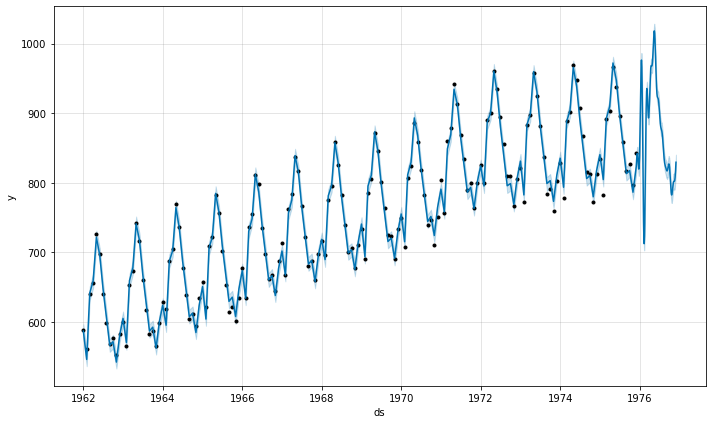

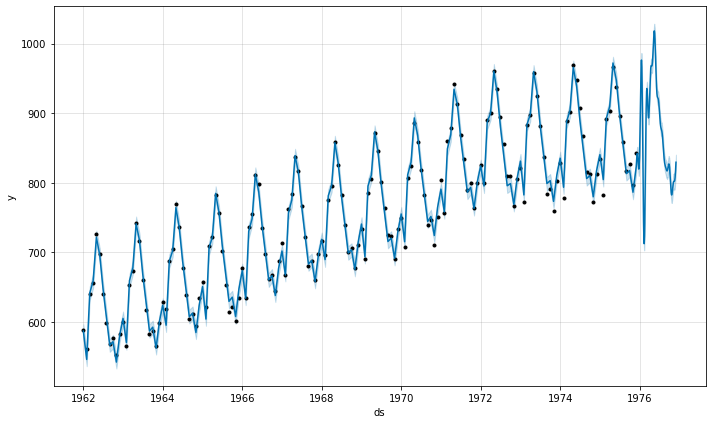

In [156]:
##### Plot the predicted projection
model.plot(prediction)

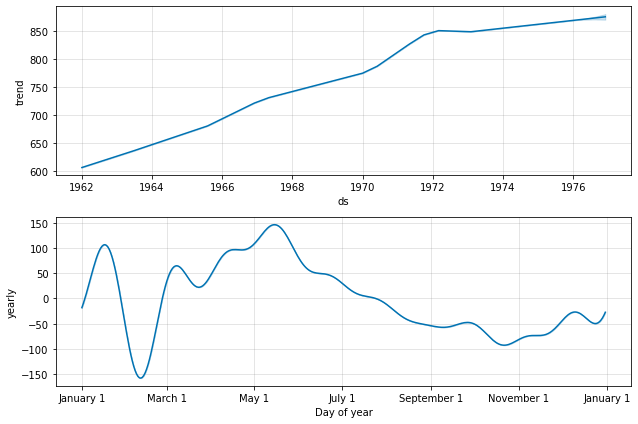

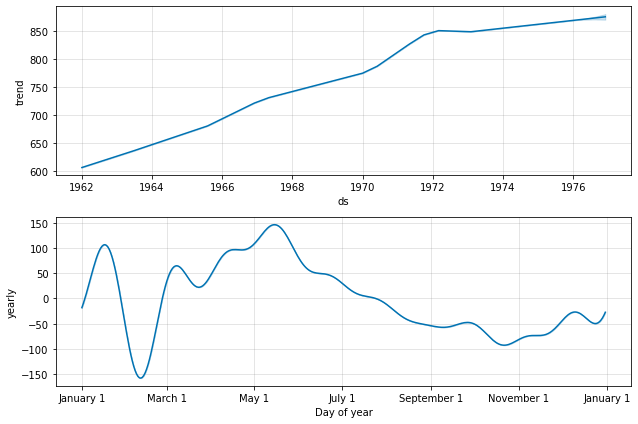

In [157]:
####Visualise the Each components 
model.plot_components(prediction)

# Cross Validation

In [158]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon="365 days",period="180 days",initial="1095 days")

  0%|                                                    | 0/21 [00:00<?, ?it/s]21:58:32 - cmdstanpy - INFO - Chain [1] start processing
21:59:01 - cmdstanpy - INFO - Chain [1] done processing
  5%|██                                          | 1/21 [00:29<09:56, 29.85s/it]21:59:02 - cmdstanpy - INFO - Chain [1] start processing
21:59:02 - cmdstanpy - INFO - Chain [1] done processing
 10%|████▏                                       | 2/21 [00:31<04:09, 13.12s/it]21:59:03 - cmdstanpy - INFO - Chain [1] start processing
21:59:04 - cmdstanpy - INFO - Chain [1] done processing
 14%|██████▎                                     | 3/21 [00:32<02:21,  7.84s/it]21:59:05 - cmdstanpy - INFO - Chain [1] start processing
21:59:05 - cmdstanpy - INFO - Chain [1] done processing
 19%|████████▍                                   | 4/21 [00:34<01:31,  5.40s/it]21:59:06 - cmdstanpy - INFO - Chain [1] start processing
21:59:07 - cmdstanpy - INFO - Chain [1] done processing
 24%|██████████▍                   

In [159]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
247,1975-08-01,850.819261,841.171228,860.779728,858.0,1974-12-01
248,1975-09-01,808.417340,797.873406,818.375446,817.0,1974-12-01
249,1975-10-01,811.850166,800.965511,822.420538,827.0,1974-12-01
250,1975-11-01,779.860082,769.330729,790.023798,797.0,1974-12-01
251,1975-12-01,814.421540,803.896068,824.895459,843.0,1974-12-01


In [160]:
from prophet.diagnostics import performance_metrics
df_performance = performance_metrics(df_cv)

In [162]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,38 days,252.262268,15.882766,12.245238,0.015672,0.013765,0.015662,0.36
1,41 days,250.209431,15.818010,12.161981,0.015601,0.013765,0.015591,0.36
2,42 days,265.457681,16.292872,12.630874,0.016252,0.013902,0.016251,0.36
3,43 days,267.569378,16.357548,12.917430,0.016708,0.013902,0.016710,0.34
4,46 days,254.001526,15.937425,12.704926,0.016444,0.013902,0.016431,0.32
...,...,...,...,...,...,...,...,...
180,357 days,869.638923,29.489641,22.261365,0.027990,0.018659,0.027623,0.40
181,360 days,678.371315,26.045562,19.214600,0.023842,0.017239,0.023642,0.44
182,361 days,666.028697,25.807532,18.828589,0.023451,0.013880,0.023265,0.44
183,362 days,649.550849,25.486287,18.132637,0.022652,0.013387,0.022478,0.48


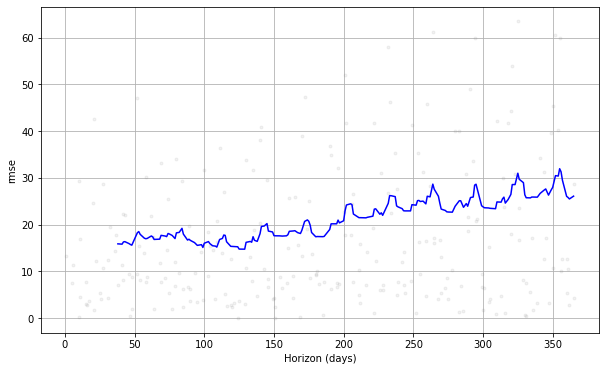

In [163]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='rmse')